<a href="https://colab.research.google.com/github/albertosilva007/Aloca-odeprofessores/blob/master/Analiseestudante_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Número total de estudantes: 4424
Número de estudantes com rótulos originais: 4424
Formato da matriz TF-IDF: (4424, 17)
Silhouette Score médio: 0.47

Cluster 0:
- 171
- 9254
- 9070
- 8014
- 9991
- 9254
- 9670
- 9853
- 9254
- 9085

Cluster 1:
- 9500
- 9500
- 9500
- 9500
- 9500
- 9500
- 9500
- 9500
- 9500
- 9500

Cluster 2:
- 9238
- 9238
- 9238
- 9238
- 9238
- 9238
- 9238
- 9238
- 9238
- 9238

Cluster 3:
- 9147
- 9147
- 9147
- 9147
- 9147
- 9147
- 9147
- 9147
- 9147
- 9147

Cluster 4:
- 9773
- 9773
- 9773
- 9773
- 9773
- 9773
- 9773
- 9773
- 9773
- 9773

Primeiras linhas dos dados com os rótulos atribuídos:
   Marital Status  Application mode  Application order  Course  \
0               1                17                  5     171   
1               1                15                  1    9254   
2               1                 1                  5    9070   
3               1                17                  2    9773   
4               2                39                  1    

C:\Users\c4u4l\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


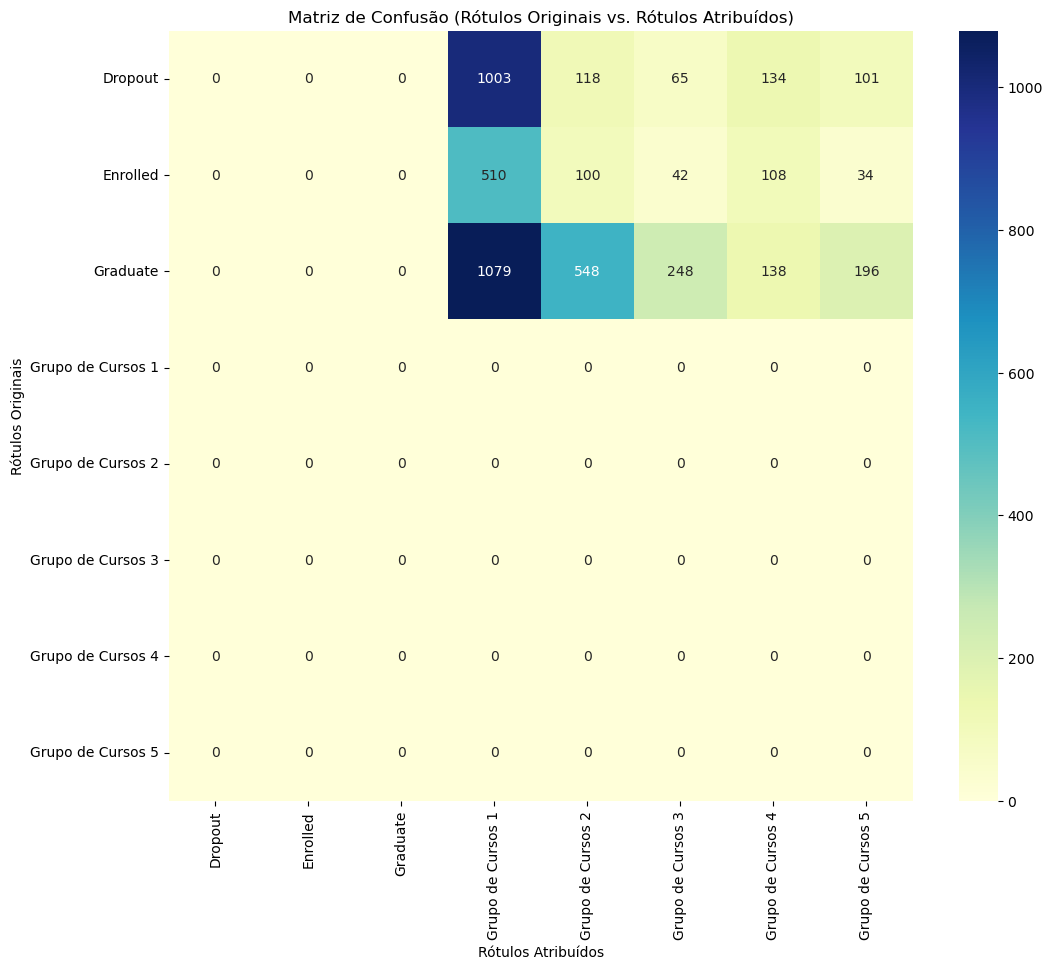

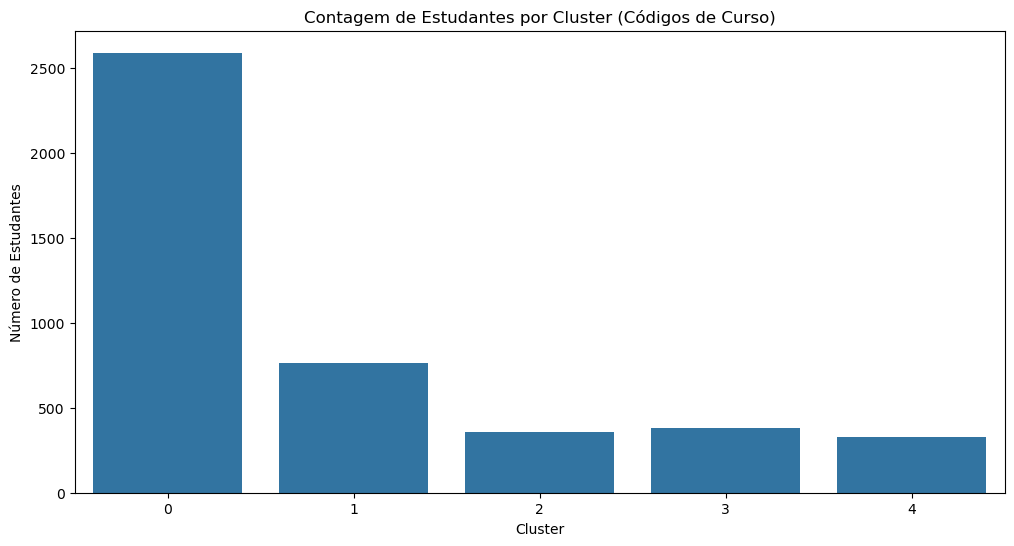

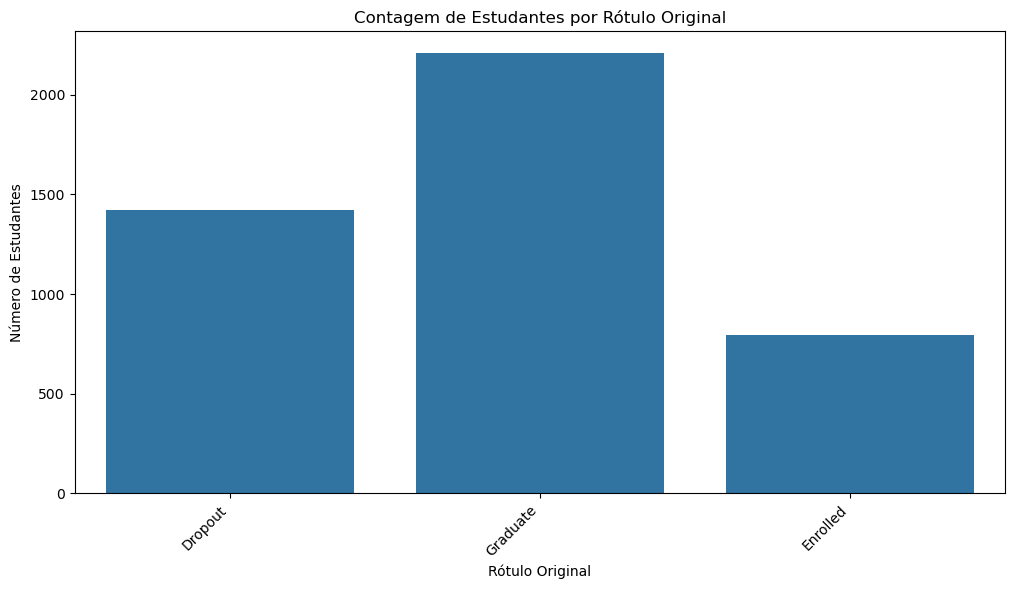

In [ ]:
# -*- coding: utf-8 -*-
"""
Pipeline de Aprendizado Semi-Supervisionado para Análise de Dados de Estudantes (Analisando Códigos de Curso)

Aluno(a): José Alberto Claudino Silva
Data: 07 de maio de 2025
Negócio: Análise de Dados de Estudantes
"""

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score


import nltk
from nltk.corpus import stopwords


try:
    stopwords.words('portuguese')
except LookupError:
    nltk.download('stopwords')


try:
    dados = pd.read_csv('students_dropout_academic_success.csv', encoding='utf-8')


    textos_coluna = 'Course'
    textos = dados[textos_coluna].astype(str)



    tem_rotulos_originais = 'target' in dados.columns
    if tem_rotulos_originais:
        rotulos_originais = dados['target']
except FileNotFoundError:
    print("Arquivo 'students_dropout_academic_success.csv' não encontrado. Certifique-se de que o arquivo existe e o caminho está correto.")
    exit()

print(f"Número total de estudantes: {len(textos)}")
if tem_rotulos_originais:
    print(f"Número de estudantes com rótulos originais: {len(rotulos_originais.dropna())}")



portuguese_stopwords = stopwords.words('portuguese') if 'portuguese' in stopwords.fileids() else []
vectorizer = TfidfVectorizer(stop_words=portuguese_stopwords, max_df=0.8, min_df=2)
tfidf_matrix = vectorizer.fit_transform(textos)

print(f"Formato da matriz TF-IDF: {tfidf_matrix.shape}")


n_clusters = 5

kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=42)
dados['cluster'] = kmeans.fit_predict(tfidf_matrix)


silhouette_avg = silhouette_score(tfidf_matrix, dados['cluster'].to_numpy())
print(f"Silhouette Score médio: {silhouette_avg:.2f}")


for i in range(n_clusters):
    print(f"\nCluster {i}:")
    exemplos_cluster = dados[dados['cluster'] == i][textos_coluna].head(10).values
    for exemplo in exemplos_cluster:
        print(f"- {exemplo}")


mapeamento_rotulos = {
    0: 'Grupo de Cursos 1',
    1: 'Grupo de Cursos 2',
    2: 'Grupo de Cursos 3',
    3: 'Grupo de Cursos 4',
    4: 'Grupo de Cursos 5'
}


dados['rotulo_atribuido'] = dados['cluster'].map(mapeamento_rotulos)

print("\nPrimeiras linhas dos dados com os rótulos atribuídos:")
print(dados.head())




X = tfidf_matrix
y = dados['rotulo_atribuido']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


modelo_classificacao = LogisticRegression(solver='liblinear', random_state=42, multi_class='ovr')
modelo_classificacao.fit(X_train, y_train)


y_pred = modelo_classificacao.predict(X_test)


print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))

print(f"Acurácia do modelo de classificação: {accuracy_score(y_test, y_pred):.2f}")


if tem_rotulos_originais:
    print("\nComparação com os rótulos originais (se disponíveis):")
    from sklearn.metrics import confusion_matrix
    from sklearn.preprocessing import LabelEncoder


    le = LabelEncoder()
    all_labels = pd.concat([rotulos_originais.fillna('Outros'), dados['rotulo_atribuido']])
    le.fit(all_labels)

    rotulos_originais_encoded = le.transform(rotulos_originais.fillna('Outros'))
    rotulos_atribuidos_encoded = le.transform(dados['rotulo_atribuido'])

    cm = confusion_matrix(rotulos_originais_encoded, rotulos_atribuidos_encoded)
    plt.figure(figsize=(12, 10))
    sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu',
                xticklabels=le.classes_,
                yticklabels=le.classes_)
    plt.title('Matriz de Confusão (Rótulos Originais vs. Rótulos Atribuídos)')
    plt.xlabel('Rótulos Atribuídos')
    plt.ylabel('Rótulos Originais')
    plt.show()




plt.figure(figsize=(12, 6))
sns.countplot(data=dados, x='cluster')
plt.title('Contagem de Estudantes por Cluster (Códigos de Curso)')
plt.xlabel('Cluster')
plt.ylabel('Número de Estudantes')
plt.show()


if tem_rotulos_originais:
    plt.figure(figsize=(12, 6))
    sns.countplot(data=dados, x='target')
    plt.title('Contagem de Estudantes por Rótulo Original')
    plt.xlabel('Rótulo Original')
    plt.ylabel('Número de Estudantes')
    plt.xticks(rotation=45, ha="right")
    plt.show()